# Model Building and Evaluation For Dataset where Rows with Missing Values were Deleted

## Importing the Necessary Libraries and Loading the Dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# %matplotlib inline

In [2]:
# load preprocessed dataset
df = pd.read_csv('./df_row_del_dataset.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,391,19.2,395.77,15.10,17.5
390,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,391,19.2,396.90,14.33,16.8
391,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
392,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9


## Getting the Variables and Spliting the Data

Here, we get the independent(X) and dependent(y) features/variables for the 2 split dataset - `train` and `test`. Test size will be set to 30% while 70% will be for the train. 'random state' is added to make the split reproducible irrespective of the hardware it is run on.

Before we get the variables, we want to reset the index. We don't have to but it's nicer to do.

In [3]:
# split the dataset
# test size:- 20%
# train size:- 80%

# np.random.seed(0)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)

In [4]:
len(df_train), len(df_test), len(df_train) + len(df_test)

(275, 119, 394)

#### Train Dataset

In [5]:
# reset index for df_train because it was shuffled on split
df_train = df_train.reset_index(drop=True)
df_train

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0
1,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,666,20.2,394.43,17.11,15.1
2,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,307,21.0,358.77,18.35,13.1
3,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,307,17.4,391.70,9.71,26.7
4,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,666,20.2,96.73,21.52,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,264,13.0,392.80,9.59,33.8
271,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,287,19.6,396.90,12.79,22.2
272,0.05735,0.0,4.49,0.0,0.449,6.630,56.1,4.4377,247,18.5,392.30,6.53,26.6
273,0.07503,33.0,2.18,0.0,0.472,7.420,71.9,3.0992,222,18.4,396.90,6.47,33.4


In [6]:
# get the independent(X) variable for the train dataset
X_train = df_train.iloc[:, :-1]
X_train

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48
1,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,666,20.2,394.43,17.11
2,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,307,21.0,358.77,18.35
3,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,307,17.4,391.70,9.71
4,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,666,20.2,96.73,21.52
...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,264,13.0,392.80,9.59
271,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,287,19.6,396.90,12.79
272,0.05735,0.0,4.49,0.0,0.449,6.630,56.1,4.4377,247,18.5,392.30,6.53
273,0.07503,33.0,2.18,0.0,0.472,7.420,71.9,3.0992,222,18.4,396.90,6.47


In [7]:
# getting the dependent(y) variable for train dataset

y_train = df_train.iloc[:, -1]
y_train

0      22.0
1      15.1
2      13.1
3      26.7
4      11.0
       ... 
270    33.8
271    22.2
272    26.6
273    33.4
274    21.2
Name: medv, Length: 275, dtype: float64

#### Test Dataset

In [8]:
# reset index because it was shuffled on split
df_test = df_test.reset_index(drop=True)
df_test

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,276,18.0,391.83,11.34,21.4
1,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,293,16.6,371.72,9.51,24.8
2,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,666,20.2,10.48,19.01,12.7
3,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,403,14.7,396.90,26.42,15.6
4,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,264,13.0,384.54,7.44,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,307,21.0,386.85,6.58,23.1
115,5.29305,0.0,18.10,0.0,0.700,6.051,82.5,2.1678,666,20.2,378.38,18.76,23.2
116,0.43571,0.0,10.59,1.0,0.489,5.344,100.0,3.8750,277,18.6,396.90,23.09,20.0
117,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,384,20.9,387.69,14.09,20.4


In [9]:

# get the independent(X) variable for the test dataset
X_test = df_test.iloc[:, :-1]
X_test

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
0,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,276,18.0,391.83,11.34
1,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,293,16.6,371.72,9.51
2,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,666,20.2,10.48,19.01
3,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,403,14.7,396.90,26.42
4,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,264,13.0,384.54,7.44
...,...,...,...,...,...,...,...,...,...,...,...,...
114,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,307,21.0,386.85,6.58
115,5.29305,0.0,18.10,0.0,0.700,6.051,82.5,2.1678,666,20.2,378.38,18.76
116,0.43571,0.0,10.59,1.0,0.489,5.344,100.0,3.8750,277,18.6,396.90,23.09
117,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,384,20.9,387.69,14.09


In [10]:
# getting the dependent(y) variable for test dataset

y_test = df_test.iloc[:, -1]
y_test

0      21.4
1      24.8
2      12.7
3      15.6
4      50.0
       ... 
114    23.1
115    23.2
116    20.0
117    20.4
118    14.1
Name: medv, Length: 119, dtype: float64

#### Variable Summary

- X_train
- y_train
- X_test
- y_test

## Standardizing the Dataset
We need to standardize our features X because they are calculated to different units and need to be brought to the same scale. Internally, gradient descent is used. The aim is to come to a global minimum, which is achieved through making all our independent(X) unit be in the same scale. This is done using the StandardScaler from sklearn

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
# train the model(train)

model.fit(X_train, y_train)

LinearRegression()

In [15]:
## print the coefficients and the intercepts for independent features
model.coef_

array([ 0.01932997,  0.56411982, -0.43894269,  0.95048388, -1.25653194,
        3.05920052, -0.30485012, -2.75562707,  0.02103489, -1.64091186,
        1.01347726, -3.88134558])

In [16]:
model.intercept_

22.725090909090913

### Interpreting the Coefficient and Intercept

From the result gotten from the cell for coefficient, it can be observed that with the increase in the `nox` value, there will be `-3.59432979` decrease in price(`medv`) value and so on for the rest of the features/columns.

From the result gotten from the cell for intercept, it can be observed that .....

In [17]:
## on which parameters has the model been trained

model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [18]:
## predict with the test dataset

model_test_pred = model.predict(X_test)
model_test_pred

# the result are our prediction

array([24.98294199, 25.77655366, 10.98791147, 12.45147403, 40.73095672,
       32.17776199, 27.87483993, 23.56994299, 29.43072037, 19.70050885,
       17.79180684, 23.26183564, 12.84915444, 44.76136261, 19.14608212,
       25.82001771, 20.51872995, 27.22822015,  9.67091883, 25.53822897,
       26.92748701, 24.23667526,  8.42371829, 26.83019559, 18.4512223 ,
        9.44615264, 20.30140313,  7.09564873, 29.05082279, 23.50641812,
       16.97765984, 23.13635352, 28.82662033, 17.73574633, 33.40259592,
       24.07823808, 41.45016569, 15.03435127, 32.1159245 , 16.30932053,
       32.08640141, 25.14313002, 15.21704367, 24.33749321, 20.18789635,
       40.13011501, 17.96768396, 27.08582609, 21.34631382, 20.51575343,
       23.87740932, 36.56567476, 26.87402779, 23.30159909, 12.43912055,
       32.54327455,  8.44694026, 18.18709716, 14.82212591, 16.53962729,
       -1.29059171, 22.11988572, 31.93836117, 23.14469723, 34.00641291,
       28.34608058,  3.87213319, 20.37578272, 19.63182663, 16.34

We have predictions from both the test datasets. We need to compare it against our y_test since they hold the true value for price data. This tells us how well our model is performing.

Text(0, 0.5, 'model_test_pred')

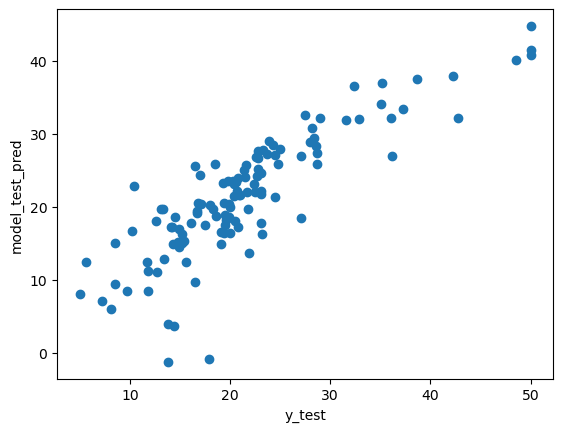

In [19]:
## plotting our predictions against our dependent variable y

plt.scatter(y_test, model_test_pred)
plt.xlabel("y_test")
plt.ylabel("model_test_pred")

It is observed from the preceeding cells that our model is performing ok since we have a linear relationship between the prediction and the price value

c:\Users\DELL\anaconda3\envs\boston_house_pricing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Errors')

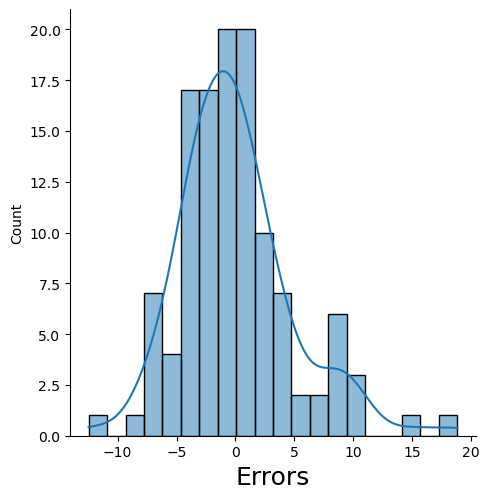

In [20]:
# residuals for test dataset, i.e, errors
test_residuals = y_test - model_test_pred

# plot the residuals for test data
sns.displot(test_residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 18)

We see from the graphs that we have a normal distribution for the test dataset with some amount of outliers in our `test_residuals`. It shows that our model is doing ok.

## Model Evaluation

It is important to use other performance metrics to really see how our model is doing. For the evaluation metrics using the sklearn library, we will use:

- mean_squared_error
- mean_absolute_error
- R square
- adjusted_r_square

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, model_test_pred))
print(mean_squared_error(y_test, model_test_pred))
print(np.sqrt(mean_squared_error(y_test, model_test_pred)))

3.5011229619694753
22.857708098608335
4.780973551339553


Describe the result from the preceeding cell

### R Square

$R^2 = 1 - SSR/SST$

where $R^2$ = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [22]:
# r2_score for the test dataset
from sklearn.metrics import r2_score

score = r2_score(y_test, model_test_pred)
score

0.7147470620507683

### Adjusted R Square

$R^2 = 1 - [(1-R^2) * (n - 1) / (n - k - 1)]$

where $R^2$ = the R^2 of the model n = the number of observations k = the number of predictor variables

In [23]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.6824542766225534

The adjusted r2_score is less than the r2_score for test data which is the expected behaviour

## New Data Prediction

We want to take up a new data and predict it using our regression model to see our output. We must transform our data (i.e, standardization) before predicting

In [24]:
# to get single data point
df.values[0].shape

# training our model made it 2 dimensions so we have to reshape to get the 2 dimension. This is how we give the model for prediction
# df.iloc[:, :-1].values[0].reshape(1, -1)
# X = df.iloc[:, :-1].values[0].reshape(1, -1)
X = df.iloc[:, :-1].values[0].reshape(1, -1)
X


array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 2.960e+02, 1.530e+01, 3.969e+02, 4.980e+00]])

In [25]:
# scale before predict
model.predict(scaler.transform(X))
# X_train

c:\Users\DELL\anaconda3\envs\boston_house_pricing\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([31.16482854])

In [26]:
# cross-checking the prediction

df.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,296,15.3,396.9,4.98,24.0


In [30]:
# getting datapoint at the 5th position to test prediction

X_new = df.iloc[:, :-1].values[10].reshape(1, -1)
X_new

array([[  0.62976,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.949  ,
         61.8    ,   4.7075 , 307.     ,  21.     , 396.9    ,   8.26   ]])

In [31]:
# scale before predict
model.predict(scaler.transform(X_new))

c:\Users\DELL\anaconda3\envs\boston_house_pricing\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([20.69425739])

In [32]:
df.loc[[9]]

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
9,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,311,15.2,390.5,15.71,21.7


`31.16482854` was predicted as price for the first value while the original price for the first data point is `24.0`. We can say the prediction is close.

## Pickling the Model File for Deployment

We have to pickle the regression model

In [ ]:
import pickle

In [ ]:
# dump into a file

pickle.dump(model, open("regmodel.pkl", "wb"))

In [ ]:
# load pickle file

pickled_model = pickle.load(open("regmodel.pkl", "rb"))

In [ ]:
# use the pickled file to make prediction. it can be saved on local storage or cloud

pickled_model.predict(scaler.transform(X))